# Logan T Hernandez

## Research question/interests

**My part of the project will be exploring the change in housing prices, new housing construction, and population of canadian metropolitan areas over time.**

My research question is related to the change in available housing, cost, and population of canadian metropolitan areas. I believe that everyone under 30 is worried about the state of the housing market and availability of affordable living. With this concern in mind, I plan to visualize how the market has changed over time relative to population increases of metropolitan hubs. Since hubs provide the greatest opportunity for career advancement, people who want to earn high paying jobs often relocate to hubs; however, the cost of living in the hub also dictates its affordability, with the highest C.O.L. expenditure being housing. Therefore, my analysis will also attempt to determine the most affordable canadian metropolitan hub respective of housing cost and inventory.

In [103]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


sns.set_theme(style='whitegrid', font_scale=2)

DailyInterestRate = pd.read_csv("../data/raw/DailyInterestRates/DailyInterestRates.csv")
NewHousingPIndex = pd.read_csv("../data/raw/NewHousingPIndex/NewHousingPIndex.csv")
NewInventory = pd.read_csv("../data/raw/NewInventory/NewInventory.csv", low_memory = False)
PopEstimate = pd.read_csv("../data/raw/PopEstimate/PopEstimate.csv")

In [96]:
PopEstimate.head(5)

,REF_DATE,GEO,DGUID,Sex,Age group,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,2001,Canada,2016A00001124,Both sexes,All ages,Persons,249,units,0,v1462635598,178.1.1,31020902.0,NaN,NaN,NaN,0
1,2001,Canada,2016A00001124,Both sexes,0 to 4 years,Persons,249,units,0,v1462635576,178.1.2,1754354.0,NaN,NaN,NaN,0
2,2001,Canada,2016A00001124,Both sexes,0 years,Persons,249,units,0,v1462635484,178.1.3,328494.0,NaN,NaN,NaN,0
3,2001,Canada,2016A00001124,Both sexes,1 year,Persons,249,units,0,v1462635485,178.1.4,345259.0,NaN,NaN,NaN,0
4,2001,Canada,2016A00001124,Both sexes,2 years,Persons,249,units,0,v1462635486,178.1.5,349563.0,NaN,NaN,NaN,0


## Data Wrangling
Theres quite a few columns here that are going to be erraneous for my analysis, so I'm first going to drop the columns that are not directly related to the general geographical location and to the population, and age of populants. 

In [21]:
PE_Wrangled = PopEstimate.drop(columns=['DGUID', 'UOM_ID', 'SCALAR_FACTOR', 'SCALAR_ID', 'VECTOR', 'COORDINATE', 'STATUS', 'SYMBOL', 'TERMINATED', 'DECIMALS'], axis=1).reset_index()
PE_Wrangled = PE_Wrangled.drop(columns=["index"]) 
PE_Wrangled.sample(10)

,REF_DATE,GEO,Sex,Age group,UOM,VALUE
216735,2004,"Woodstock (CA), Ontario",Both sexes,61 years,Persons,319.0
43561,2001,"Medicine Hat (CA), Alberta",Both sexes,75 to 79 years,Persons,1918.0
268090,2005,"Sainte-Marie (CA), Quebec",Both sexes,20 to 24 years,Persons,869.0
584,2001,All census metropolitan areas and census agglo...,Females,6 years,Persons,156083.0
560054,2010,"St. Catharines - Niagara (CMA), Ontario",Males,2 years,Persons,1873.0
1099166,2018,"Prince George (CA), British Columbia",Females,15 to 64 years,Persons,31813.0
34082,2001,"Chatham-Kent (CA), Ontario",Females,34 years,Persons,709.0
162941,2003,"Yorkton (CA), Saskatchewan",Both sexes,83 years,Persons,126.0
83498,2002,"Sept-Îles (CA), Quebec",Both sexes,5 years,Persons,359.0
478791,2008,"Nelson (CA), British Columbia",Females,37 years,Persons,134.0


This is a lot more concise already, and only includes values explicitly related to my analysis. Interestingly, the unit of measurement (UOM) column provides an additional level of data formatting that i can utilize later, as it will allow me to filter the data by average ages. I'm not sure if I will use this yet, however the analysis to do so will simply filter the wrangled dataset by UOM value == Persons or years. The same filter can be applied by using the age group category, however it will provide more explicit filtration as this category also inlcudes all age groups of each city's population. As for now, I will conduct some additional exploratory analysis using plots. 

## Visual EDA

I think a good place to start will be constructing a boxplot showing the total population counts relative to the geographical area. Geographical area will be on the y plane to avoid formatting issues.

In [64]:
PE_GB_GEO = PE_Wrangled.groupby('GEO').sum().reset_index()
PE_GB_GEO

/var/folders/v9/f2hd85ns75q9chg2z10c7wcc0000gn/T/ipykernel_6582/870740426.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  PE_GB_GEO = PE_Wrangled.groupby('GEO').sum().reset_index()


,GEO,REF_DATE,VALUE
0,"Abbotsford - Mission (CMA), British Columbia",15267285,3.134526e+07
1,All areas outside census metropolitan areas an...,15267285,1.054672e+09
2,"All census agglomerations, Canada",15267285,7.498925e+08
3,All census metropolitan areas and census agglo...,15267285,5.033420e+09
4,"All census metropolitan areas, Canada",15267285,4.283533e+09
...,...,...,...
173,"Winnipeg (CMA), Manitoba",15267285,1.345632e+08
174,"Wood Buffalo (CA), Alberta",15267285,1.168464e+07
175,"Woodstock (CA), Ontario",15267285,7.107936e+06
176,"Yellowknife (CA), Northwest Territories",15267285,3.594696e+06


/Users/loganher/miniconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)


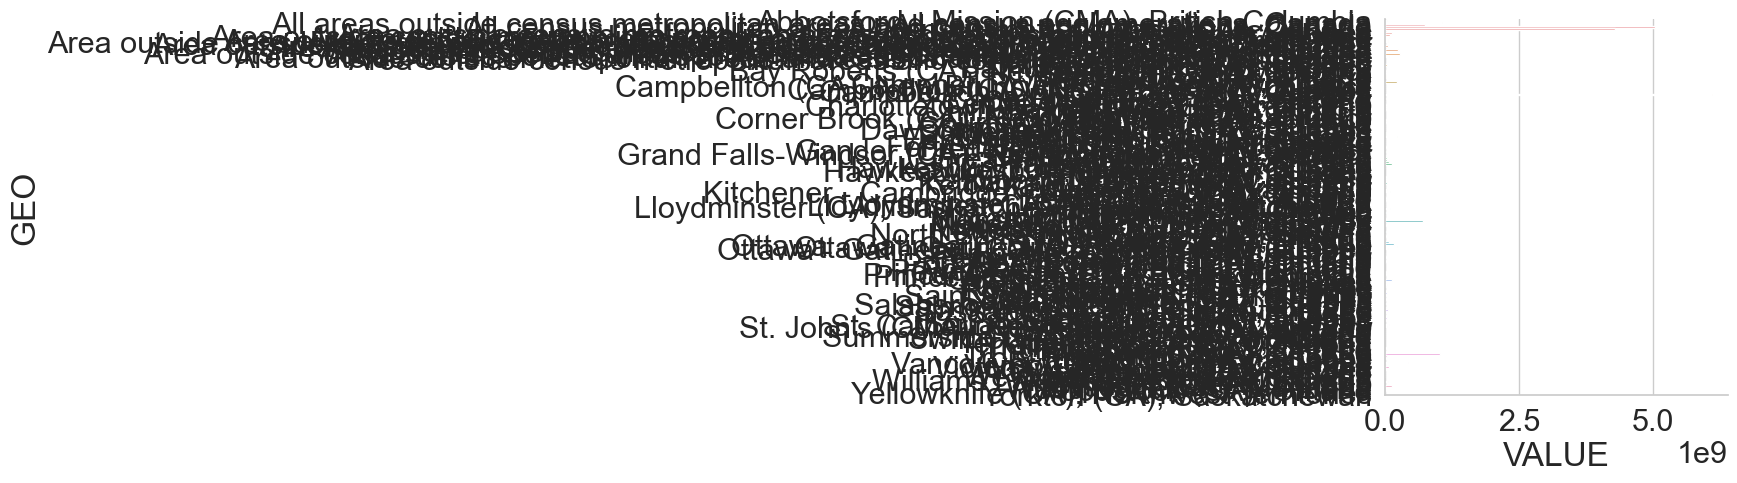

In [63]:
sns.catplot(data=PE_GB_GEO, y='GEO', x='VALUE', kind='bar')
n=None

Wow, thats really horrible. I'm going to drop the less important region values now, as theres simply too much to plot currently. 

I'm going to drop all regions that are not well known metropolitan hubs, first i"ll determine which to keep by looking at the population value in descending order.

In [82]:
sorted(PE_GB_GEO['GEO'].unique().tolist())

['Abbotsford - Mission (CMA), British Columbia',
 'All areas outside census metropolitan areas and census agglomerations, Canada',
 'All census agglomerations, Canada',
 'All census metropolitan areas and census agglomerations, Canada',
 'All census metropolitan areas, Canada',
 'Alma (CA), Quebec',
 'Area outside census metropolitan areas and census agglomerations, Alberta',
 'Area outside census metropolitan areas and census agglomerations, British Columbia',
 'Area outside census metropolitan areas and census agglomerations, Manitoba',
 'Area outside census metropolitan areas and census agglomerations, New Brunswick',
 'Area outside census metropolitan areas and census agglomerations, Newfoundland and Labrador',
 'Area outside census metropolitan areas and census agglomerations, Northwest Territories',
 'Area outside census metropolitan areas and census agglomerations, Nova Scotia',
 'Area outside census metropolitan areas and census agglomerations, Nunavut',
 'Area outside census m

In [72]:
PE_ordered = PE_GB_GEO.sort_values(by=['VALUE'], ascending=False)
PE_ordered.head(20)

,GEO,REF_DATE,VALUE
35,Canada,15267285,6.088087e+09
3,All census metropolitan areas and census agglo...,15267285,5.033420e+09
4,"All census metropolitan areas, Canada",15267285,4.283533e+09
1,All areas outside census metropolitan areas an...,15267285,1.054672e+09
158,"Toronto (CMA), Ontario",15267285,1.017752e+09
2,"All census agglomerations, Canada",15267285,7.498925e+08
95,"Montréal (CMA), Quebec",15267285,7.036907e+08
162,"Vancouver (CMA), British Columbia",15267285,4.241699e+08
16,Area outside census metropolitan areas and cen...,15267285,2.706236e+08
14,Area outside census metropolitan areas and cen...,15267285,2.490646e+08


This provides us with a brief description of the largest metropolitan areas in canada during the past 20 years on a combined value of total population summed for each year. Now, Ill start dropping the useless rows. First off, I'll drop 'Canada' and all other aggregated rows

In [91]:
PE_ordered_v2 = PE_ordered.drop(PE_ordered[PE_ordered.GEO.isin(['Canada','All areas outside census metropolitan areas and census agglomerations, Canada',
 'All census agglomerations, Canada',
 'All census metropolitan areas and census agglomerations, Canada',
 'All census metropolitan areas, Canada','Area outside census metropolitan areas and census agglomerations, Alberta',
 'Area outside census metropolitan areas and census agglomerations, British Columbia',
 'Area outside census metropolitan areas and census agglomerations, Manitoba',
 'Area outside census metropolitan areas and census agglomerations, New Brunswick',
 'Area outside census metropolitan areas and census agglomerations, Newfoundland and Labrador',
 'Area outside census metropolitan areas and census agglomerations, Northwest Territories',
 'Area outside census metropolitan areas and census agglomerations, Nova Scotia',
 'Area outside census metropolitan areas and census agglomerations, Nunavut',
 'Area outside census metropolitan areas and census agglomerations, Ontario',
 'Area outside census metropolitan areas and census agglomerations, Prince Edward Island',
 'Area outside census metropolitan areas and census agglomerations, Quebec',
 'Area outside census metropolitan areas and census agglomerations, Saskatchewan',
 'Area outside census metropolitan areas and census agglomerations, Yukon',])].index)
PE_ordered_filtered = PE_ordered_v2.head(30).reset_index()
PE_ordered_filtered.drop(columns=["index"])

,GEO,REF_DATE,VALUE
0,"Toronto (CMA), Ontario",15267285,1.017752e+09
1,"Montréal (CMA), Quebec",15267285,7.036907e+08
2,"Vancouver (CMA), British Columbia",15267285,4.241699e+08
3,"Ottawa - Gatineau (CMA), Ontario/Quebec",15267285,2.278083e+08
4,"Calgary (CMA), Alberta",15267285,2.269135e+08
5,"Edmonton (CMA), Alberta",15267285,2.165584e+08
6,"Ottawa - Gatineau (CMA), Ontario part, Ontario",15267285,1.720515e+08
7,"Québec (CMA), Quebec",15267285,1.360221e+08
8,"Winnipeg (CMA), Manitoba",15267285,1.345632e+08
9,"Hamilton (CMA), Ontario",15267285,1.316121e+08


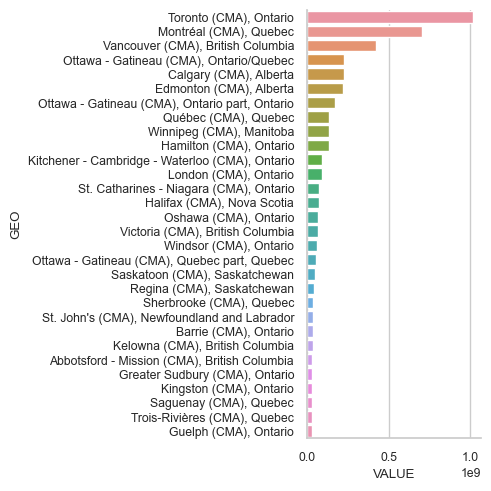

In [94]:
sns.set_theme(style='whitegrid', font_scale=0.8)
sns.catplot(data=PE_ordered_filtered, y='GEO', x='VALUE', kind='bar')
n=None

Great, now I can visualize the 30 largest metropolitan areas in Canada from their combined population counts for the past 20 years. These are the locations that I will assess in my analysis of housing inventory and price index. 


In [98]:
NewHousingPIndex.sample(10)

,REF_DATE,GEO,DGUID,New housing price indexes,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
5618,1984-11,"Saskatoon, Saskatchewan",2011S0503725,Land only,"Index, 201612=100",347,units,0,v111955540,33.3,29.8,E,NaN,NaN,1
45062,2012-04,"Hamilton, Ontario",2011S0503537,Land only,"Index, 201612=100",347,units,0,v111955504,21.3,95.7,E,NaN,NaN,1
34628,2005-01,"Kitchener-Cambridge-Waterloo, Ontario",2011S0503541,Land only,"Index, 201612=100",347,units,0,v111955510,23.3,90.5,E,NaN,NaN,1
39166,2008-03,"Ottawa-Gatineau, Quebec part, Ontario/Quebec",2011S050324505,House only,"Index, 201612=100",347,units,0,v111955488,16.2,NaN,..,NaN,NaN,1
15049,1991-06,Ontario,2016A000235,House only,"Index, 201612=100",347,units,0,v111955491,17.2,46.9,NaN,NaN,NaN,1
5851,1985-01,Saskatchewan,2016A000247,House only,"Index, 201612=100",347,units,0,v111955533,31.2,NaN,..,NaN,NaN,1
57338,2020-10,"Saskatoon, Saskatchewan",2011S0503725,Land only,"Index, 201612=100",347,units,0,v111955540,33.3,101.0,E,NaN,NaN,1
53296,2018-01,"Charlottetown, Prince Edward Island",2011S0504105,House only,"Index, 201612=100",347,units,0,v111955458,6.2,100.4,E,NaN,NaN,1
1450,1982-01,"St. John's, Newfoundland and Labrador",2011S05031,House only,"Index, 201612=100",347,units,0,v111955452,4.2,38.0,NaN,NaN,NaN,1
25813,1998-12,Prince Edward Island,2016A000211,House only,"Index, 201612=100",347,units,0,v111955455,5.2,88.1,NaN,NaN,NaN,1


## Data Wrangling

Similar to before, there's quite a few columns here that are going to be erraneous for my analysis, so I'm first going to drop the columns that are not directly related to the general geographical location and to the housing price.

In [101]:
NewHousingPIndex_Wrangled = NewHousingPIndex.drop(columns=['DGUID', 'UOM_ID', 'SCALAR_FACTOR', 'SCALAR_ID', 'VECTOR', 'COORDINATE', 'STATUS', 'SYMBOL', 'TERMINATED', 'DECIMALS'], axis=1).reset_index()
NewHousingPIndex_Wrangled = NewHousingPIndex_Wrangled.drop(columns=["index"]) 
NewHousingPIndex_Wrangled

,REF_DATE,GEO,New housing price indexes,UOM,VALUE
0,1981-01,Canada,Total (house and land),"Index, 201612=100",38.2
1,1981-01,Canada,House only,"Index, 201612=100",36.1
2,1981-01,Canada,Land only,"Index, 201612=100",40.6
3,1981-01,Atlantic Region,Total (house and land),"Index, 201612=100",NaN
4,1981-01,Atlantic Region,House only,"Index, 201612=100",NaN
...,...,...,...,...,...
60475,2022-12,"Vancouver, British Columbia",House only,"Index, 201612=100",126.8
60476,2022-12,"Vancouver, British Columbia",Land only,"Index, 201612=100",121.4
60477,2022-12,"Victoria, British Columbia",Total (house and land),"Index, 201612=100",125.0
60478,2022-12,"Victoria, British Columbia",House only,"Index, 201612=100",131.9


This is looking better, however there's way too much data compared to what I need for the analysis. My population estimates start in 2001, so I'm going to drop all data for the housing price index prior to 2001 after I ensure that the dates are correctly displayed in datetime format. 

In [108]:
NewHousingPIndex_Wrangled['REF_DATE'] = pd.to_datetime(NewHousingPIndex_Wrangled['REF_DATE'])

NHPI_W_v2 = NewHousingPIndex_Wrangled[~(NewHousingPIndex_Wrangled['REF_DATE'] < '2001-01-01')].reset_index()
NHPI_W_v2 = NHPI_W_v2.drop(columns=["index"])
NHPI_W_v2

,REF_DATE,GEO,New housing price indexes,UOM,VALUE
0,2001-01-01,Canada,Total (house and land),"Index, 201612=100",58.7
1,2001-01-01,Canada,House only,"Index, 201612=100",55.5
2,2001-01-01,Canada,Land only,"Index, 201612=100",67.4
3,2001-01-01,Atlantic Region,Total (house and land),"Index, 201612=100",64.2
4,2001-01-01,Atlantic Region,House only,"Index, 201612=100",65.7
...,...,...,...,...,...
31675,2022-12-01,"Vancouver, British Columbia",House only,"Index, 201612=100",126.8
31676,2022-12-01,"Vancouver, British Columbia",Land only,"Index, 201612=100",121.4
31677,2022-12-01,"Victoria, British Columbia",Total (house and land),"Index, 201612=100",125.0
31678,2022-12-01,"Victoria, British Columbia",House only,"Index, 201612=100",131.9


Great, now I need to explore the dataset relative to GEO and make a comparison to the population data previously explored. At this point im making a decision on the data I wish to use for the housing price, available to me are the cost of the house and the land and the combined total, I think it would be more applicable if the combined price was used as it would encompass inflation from both angles (I also will rename it as a new variable in case i go back on this decision later).

In [110]:
sorted(NHPI_W_v2['GEO'].unique().tolist())

['Alberta',
 'Atlantic Region',
 'British Columbia',
 'Calgary, Alberta',
 'Canada',
 'Charlottetown, Prince Edward Island',
 'Edmonton, Alberta',
 'Greater Sudbury, Ontario',
 'Guelph, Ontario',
 'Halifax, Nova Scotia',
 'Hamilton, Ontario',
 'Kelowna, British Columbia',
 'Kitchener-Cambridge-Waterloo, Ontario',
 'London, Ontario',
 'Manitoba',
 'Montréal, Quebec',
 'New Brunswick',
 'Newfoundland and Labrador',
 'Nova Scotia',
 'Ontario',
 'Oshawa, Ontario',
 'Ottawa-Gatineau, Ontario part, Ontario/Quebec',
 'Ottawa-Gatineau, Quebec part, Ontario/Quebec',
 'Prairie Region',
 'Prince Edward Island',
 'Quebec',
 'Québec, Quebec',
 'Regina, Saskatchewan',
 'Saint John, Fredericton, and Moncton, New Brunswick',
 'Saskatchewan',
 'Saskatoon, Saskatchewan',
 'Sherbrooke, Quebec',
 'St. Catharines-Niagara, Ontario',
 "St. John's, Newfoundland and Labrador",
 'Toronto, Ontario',
 'Trois-Rivières, Quebec',
 'Vancouver, British Columbia',
 'Victoria, British Columbia',
 'Windsor, Ontario',
 'W

In [114]:
NHPI_W_v3 = NHPI_W_v2.drop(NHPI_W_v2[NHPI_W_v2['New housing price indexes'].isin(['House only','Land only'])].index)
NHPI_W_v3 = NHPI_W_v3.reset_index()
NHPI_W_v3.drop(columns=["index"])

,REF_DATE,GEO,New housing price indexes,UOM,VALUE
0,2001-01-01,Canada,Total (house and land),"Index, 201612=100",58.7
1,2001-01-01,Atlantic Region,Total (house and land),"Index, 201612=100",64.2
2,2001-01-01,Newfoundland and Labrador,Total (house and land),"Index, 201612=100",49.5
3,2001-01-01,"St. John's, Newfoundland and Labrador",Total (house and land),"Index, 201612=100",49.5
4,2001-01-01,Prince Edward Island,Total (house and land),"Index, 201612=100",85.7
...,...,...,...,...,...
10555,2022-12-01,"Edmonton, Alberta",Total (house and land),"Index, 201612=100",109.5
10556,2022-12-01,British Columbia,Total (house and land),"Index, 201612=100",127.6
10557,2022-12-01,"Kelowna, British Columbia",Total (house and land),"Index, 201612=100",123.4
10558,2022-12-01,"Vancouver, British Columbia",Total (house and land),"Index, 201612=100",128.2
